# Project Description
The supermarket sales dataset captures detailed transaction information from different branches of a supermarket chain. 
Description of each column:

1. Invoice ID: A unique identifier for each transaction.
2. Branch: Indicates the branch location where the sale occurred, typically identified by city names or branch codes.
3. Yangon, Naypyitaw, Mandalay: Specific branches or cities where the transactions took place.
4. Customer type: Classifies customers, such as "Member" or "Normal," indicating whether they are part of a loyalty program.
5. Gender: The gender of the customer, usually classified as Male or Female.
6. Product line: Categories of products sold, such as "Electronics," "Food," or "Fashion."
7. Unit price: The price of a single unit of the product sold.
8. Quantity: The number of units sold in a single transaction.
9. Tax 5%: The amount of tax applied to the transaction, calculated as 5% of the subtotal.
10. Total: The total amount paid by the customer, including tax.
11. Date: The date on which the transaction occurred.
12. Time: The exact time when the transaction was processed.
13. Payment: The payment method used by the customer, such as "Cash," "Credit Card," or "E-wallet."
14. Rating: Customer feedback rating for the transaction, often on a scale from 1 to 100.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns


## Gather

In [64]:
# Read the CSV file into a DataFrame
df=pd.read_csv("Capstone Data - Supermarket Sales.csv")


## Assess

In [65]:
df

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,3/3/2019,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2/5/2019,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2019,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,8.4


## data exploring :
1. Explore and Understand the Data:

In [66]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB
None
            Yangon    Naypyitaw 

2. Data Type Validation

In [67]:
df['Unit price'] = df['Unit price'].astype(str).str.replace('[^\d.]', '', regex=True)


In [68]:
# Define expected data types for each column
expected_dtypes = {
    'Invoice ID': 'object',  
    'Branch': 'object',
    'Yangon': 'object',
    'Naypyitaw': 'object',
    'Mandalay': 'object',
    'Customer type': 'object',
    'Gender': 'object',
    'Product line': 'object',
    'Unit price': 'float64', 
    'Quantity': 'int64',      
    'Tax 5%': 'float64',
    'Total': 'float64',
    'Date': 'object',         
    'Time': 'object',
    'Payment': 'object',
    'Rating': 'float64'
}

# Check actual data types of the DataFrame
actual_dtypes = df.dtypes.to_dict()

# Compare expected vs. actual data types
for col, expected_dtype in expected_dtypes.items():
    actual_dtype = actual_dtypes.get(col)
    if actual_dtype != expected_dtype:
        print(f"Column '{col}' has a mismatched data type: Expected {expected_dtype}, but got {actual_dtype}.")
    else:
        print(f"Column '{col}' data type is correct: {expected_dtype}.")


Column 'Invoice ID' data type is correct: object.
Column 'Branch' data type is correct: object.
Column 'Yangon' has a mismatched data type: Expected object, but got int64.
Column 'Naypyitaw' has a mismatched data type: Expected object, but got int64.
Column 'Mandalay' has a mismatched data type: Expected object, but got int64.
Column 'Customer type' data type is correct: object.
Column 'Gender' data type is correct: object.
Column 'Product line' data type is correct: object.
Column 'Unit price' has a mismatched data type: Expected float64, but got object.
Column 'Quantity' data type is correct: int64.
Column 'Tax 5%' data type is correct: float64.
Column 'Total' data type is correct: float64.
Column 'Date' data type is correct: object.
Column 'Time' data type is correct: object.
Column 'Payment' data type is correct: object.
Column 'Rating' data type is correct: float64.


In [69]:
print(df.describe())

            Yangon    Naypyitaw     Mandalay     Quantity      Tax 5%  \
count  1006.000000  1006.000000  1006.000000  1006.000000  997.000000   
mean      0.338966     0.329026     0.332008     5.469185   15.479682   
std       0.473594     0.470093     0.471168     3.014153   11.728320   
min       0.000000     0.000000     0.000000    -8.000000    0.508500   
25%       0.000000     0.000000     0.000000     3.000000    5.986500   
50%       0.000000     0.000000     0.000000     5.000000   12.227500   
75%       1.000000     1.000000     1.000000     8.000000   22.720500   
max       1.000000     1.000000     1.000000    10.000000   49.650000   

             Total       Rating  
count  1003.000000  1006.000000  
mean    322.734689     7.056163  
std     245.865964     3.318751  
min      10.678500     4.000000  
25%     123.789750     5.500000  
50%     254.016000     7.000000  
75%     471.009000     8.500000  
max    1042.650000    97.000000  


3. Check for Missing Values

In [70]:
missing_values = df.isnull().sum() 
print(missing_values)

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           9
Total            3
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


4. Check for Duplicated Rows

In [71]:
num_duplicates = df.duplicated().sum()

print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 6


5. Check for Outliesrs

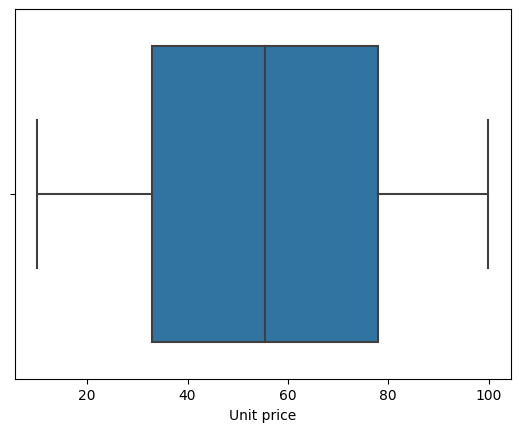

In [72]:
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce')

#Detect Outliers in price
sns.boxplot(x=df['Unit price'])
plt.show()

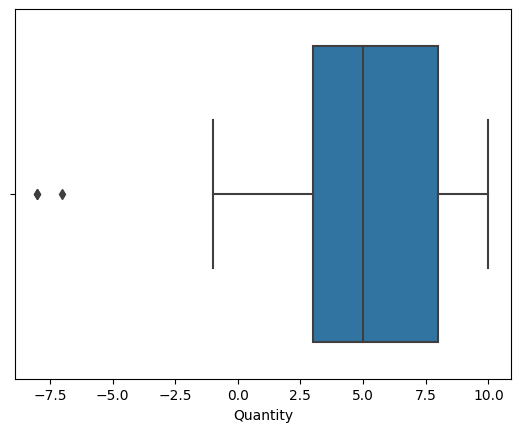

In [73]:
#Detect Outliers in Quantity
sns.boxplot(x=df['Quantity'])
plt.show()

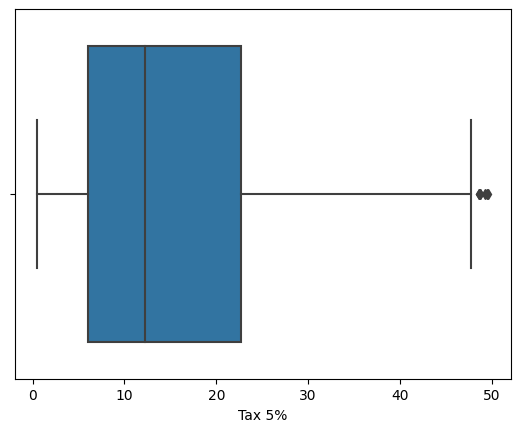

In [74]:
#Detect Outliers in Tax
sns.boxplot(x=df['Tax 5%'])
plt.show()

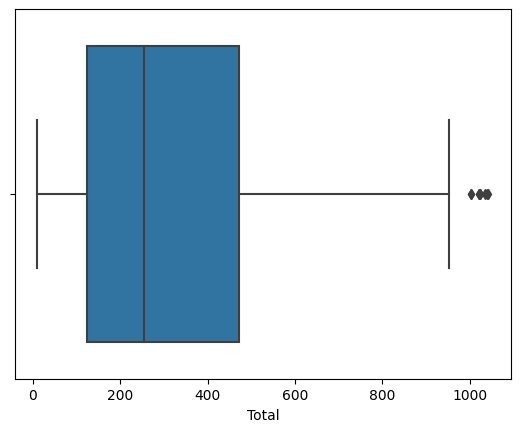

In [75]:
#Detect Outliers in Total
sns.boxplot(x=df['Total'])
plt.show()

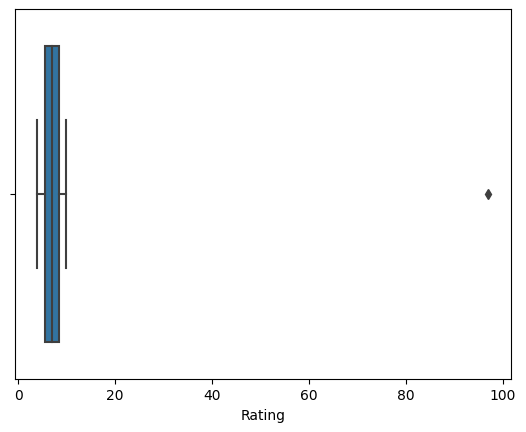

In [76]:
#Detect Outliers in Rating
sns.boxplot(x=df['Rating'])
plt.show()

# Quality issues
##### `Supermarket Sales` 
 1.  there are 6 duplicated rows 
 2.  there are missing values in 'tax' & 'total' columns
 3.  'Customer type' column contains missing values represented as '-'
 4.  'Time' column contains a value with 'pm' word 
 5.  'Time' column contains a value with different format '8-30'
 6.  some values in 'Unit price' column contains 'USD' word
 7.  'Quantity' column contains negative values
 8.  some types in 'Customer type' column represented by 'Memberr' instead of 'Member'
 9.  'Tax 5%' column contains more than 2 decimals
 10.  'Total' column contains more than 2 decimals
 11.  'Quantity' column contains some outliers
 12.  'Tax 5%' column contains some outliers
 13.  'Total' column contains some outliers
 14.  'Rating' column contains some outliers
 15.  Use Standard format for Date 
 16. Correct ''





# Cleaning

In [77]:
Data_clean = df.copy()


#####   Delete duplicated rows

In [78]:
Data_clean = Data_clean.drop_duplicates()

#####   Convert negative values to positive ones in "Quantity" column

In [79]:
Data_clean['Quantity'] = Data_clean['Quantity'].abs()

#####   Remove 'USD' in 'Unit price' column and convert the data type to numeric

In [80]:
# Data_clean['Unit price'] = Data_clean['Unit price'].astype(str).str.replace('[^\d.]', '', regex=True)


In [81]:
# Data_clean['Unit price'] = Data_clean['Unit price'].astype(str).str.replace('USD', '', regex=False)
# Data_clean['Unit price'] = pd.to_numeric(Data_clean['Unit price'])

In [82]:
contains_usd = Data_clean['Unit price'].astype(str).str.contains('USD', na=False)
contains_usd.sum()

0

In [83]:
# Data_clean['Unit price'] = Data_clean['Unit price'].replace('nan', '', regex=False)


##### Replace 'Memberr' with 'Member' in 'Customer type' column

In [84]:
Data_clean['Customer type'] = Data_clean['Customer type'].astype(str).str.replace('Memberr', 'Member', regex=False)


#####   Remove 'PM' in 'Time' column and Change it to 24 format 

In [85]:
#function to change to 24 hr format
def convert_time_column(time_str):
    return datetime.strptime(time_str.replace(' - ', ':'), "%I:%M %p").strftime("%H:%M")


In [86]:
#aaply the function
pm_rows = Data_clean['Time'].str.contains('PM')
Data_clean.loc[pm_rows, 'Time'] = Data_clean.loc[pm_rows, 'Time'].apply(convert_time_column)


#####   Replace '-' in 'Customer type' column with Nulls

In [87]:
Data_clean['Customer type'] = Data_clean['Customer type'].replace('-', np.nan)


##### Test

In [88]:
missing_values_count = Data_clean['Customer type'].isnull().sum()

print(f"Number of missing values in 'Customer type' column: {missing_values_count}")

Number of missing values in 'Customer type' column: 27


#### Missing Values:
- Customer type    27
- Tax 5%           9
- Total            3

##### Handeling Method :
1. Delete 27 rows that contains missing values in 'Customer type' column
2. Replace missing valuse in 'Tax' column using equation : Tax = Unite price * Quantity * 0.05
3. Replace missing values in 'Total' column using equation : Total = Unit price * Quantity + Tax

In [89]:
rows_with_missing_tax = Data_clean[Data_clean['Tax 5%'].isnull()]
rows_with_missing_tax

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,20:30,Ewallet,8.4
8,665-32-9167,A,1,0,0,Normal,Male,Health and beauty,36.26,2,NaN,76.1460,1/10/2019,17:15,Credit card,7.2
86,362-58-8315,C,0,1,0,Normal,Male,Fashion accessories,76.52,5,NaN,401.7300,3/25/2019,10:23,Cash,9.9
92,873-51-0671,A,1,0,0,Member,Female,Sports and travel,21.98,7,NaN,161.5530,1/10/2019,16:42,Ewallet,5.1
97,871-39-9221,C,0,1,0,Normal,Female,Electronic accessories,12.45,6,NaN,78.4350,2/9/2019,13:11,Cash,4.1
629,308-39-1707,A,1,0,0,Normal,Female,Fashion accessories,12.09,1,NaN,12.6945,1/26/2019,18:19,Credit card,8.2
830,237-44-6163,A,1,0,0,Normal,Male,Electronic accessories,10.56,8,NaN,88.7040,1/24/2019,17:43,Cash,7.6
881,115-38-7388,C,0,1,0,Member,Female,Fashion accessories,10.18,8,NaN,85.5120,3/30/2019,12:51,Credit card,9.5
903,865-41-9075,A,1,0,0,Normal,Male,Food and beverages,11.53,7,NaN,84.7455,1/28/2019,17:35,Cash,8.1


In [90]:
# Drop rows with missing values in the 'Customer type' column
Data_clean = Data_clean.dropna(subset=['Customer type'])

In [91]:
# Replace missing values in 'Tax' column using the given equation
Data_clean['Tax 5%'] = Data_clean['Tax 5%'].fillna(Data_clean['Unit price'] * Data_clean['Quantity'] * 0.05)

# Verify replacement
print(f"Missing values in 'Tax 5%': {Data_clean['Tax 5%'].isnull().sum()}")


Missing values in 'Tax 5%': 0


In [92]:
# Replace missing values in 'Total' column using the given equation
Data_clean['Total'] = Data_clean['Total'].fillna(Data_clean['Unit price'] * Data_clean['Quantity'] + Data_clean['Tax 5%'])

# Verify replacement
print(f"Missing values in 'Total': {Data_clean['Total'].isnull().sum()}")

Missing values in 'Total': 0


##### Show outlier values and remove them if necessary

In [93]:
Q1 = Data_clean['Quantity'].quantile(0.25)
Q3 = Data_clean['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = Data_clean[(Data_clean['Quantity'] < lower_bound) | (Data_clean['Quantity'] > upper_bound)]

# Display the outlier values
print("Outlier Values based on IQR method:\n", outliers['Quantity'])

Outlier Values based on IQR method:
 Series([], Name: Quantity, dtype: int64)


##### No outliers in 'Quality' After solving the -ve issue


In [94]:
Q1 = Data_clean['Tax 5%'].quantile(0.25)
Q3 = Data_clean['Tax 5%'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = Data_clean[(Data_clean['Tax 5%'] < lower_bound) | (Data_clean['Tax 5%'] > upper_bound)]

# Display the outlier values
print("Outlier Values based on IQR method:\n", outliers['Tax 5%'],outliers['Quantity'],outliers['Product line'])

Outlier Values based on IQR method:
 166    47.790
167    49.490
350    49.650
357    47.720
422    48.605
557    49.260
699    48.750
792    48.685
996    48.690
Name: Tax 5%, dtype: float64 166    10
167    10
350    10
357    10
422    10
557    10
699    10
792    10
996    10
Name: Quantity, dtype: int64 166     Home and lifestyle
167    Fashion accessories
350    Fashion accessories
357      Sports and travel
422    Fashion accessories
557     Food and beverages
699     Home and lifestyle
792     Home and lifestyle
996     Home and lifestyle
Name: Product line, dtype: object


In [95]:
outliers['Unit price']

166    95.58
167    98.98
350    99.30
357    95.44
422    97.21
557    98.52
699    97.50
792    97.37
996    97.38
Name: Unit price, dtype: float64

##### The outliers in the Tax 5% seem to be reasonable and don't need to be removed based on the unit price and quantity

In [96]:
Q1 = Data_clean['Total'].quantile(0.25)
Q3 = Data_clean['Total'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = Data_clean[(Data_clean['Total'] < lower_bound) | (Data_clean['Total'] > upper_bound)]

# Display the outlier values
print("Outlier Values based on IQR method:\n", outliers['Total'],outliers['Quantity'],outliers['Product line'])

Outlier Values based on IQR method:
 166    1003.590
167    1039.290
350    1042.650
357    1002.120
422    1020.705
557    1034.460
699    1023.750
792    1022.385
996    1022.490
Name: Total, dtype: float64 166    10
167    10
350    10
357    10
422    10
557    10
699    10
792    10
996    10
Name: Quantity, dtype: int64 166     Home and lifestyle
167    Fashion accessories
350    Fashion accessories
357      Sports and travel
422    Fashion accessories
557     Food and beverages
699     Home and lifestyle
792     Home and lifestyle
996     Home and lifestyle
Name: Product line, dtype: object


In [97]:
outliers['Unit price']

166    95.58
167    98.98
350    99.30
357    95.44
422    97.21
557    98.52
699    97.50
792    97.37
996    97.38
Name: Unit price, dtype: float64

##### Same reason as Tax %5

In [98]:
print(f"Rating Range is [{Data_clean['Rating'].min()} : {Data_clean['Rating'].max()}]")

Rating Range is [4.0 : 97.0]


In [99]:
Q1 = Data_clean['Rating'].quantile(0.25)
Q3 = Data_clean['Rating'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = Data_clean[(Data_clean['Rating'] < lower_bound) | (Data_clean['Rating'] > upper_bound)]

# Display the outlier values
print("Outlier Values based on IQR method:\n", outliers['Rating'])

Outlier Values based on IQR method:
 157    97.0
Name: Rating, dtype: float64


In [100]:
# Remove outliers
Data_clean = Data_clean[(Data_clean['Rating'] >= lower_bound) & (Data_clean['Rating'] <= upper_bound)]


In [101]:
print(f"Rating Range after clean is [{Data_clean['Rating'].min()} : {Data_clean['Rating'].max()}]")

Rating Range after clean is [4.0 : 10.0]


##### Make 'Total' and 'Tax %5' have 2 decimal places like the other numeric columns

In [102]:
Data_clean['Total']=Data_clean['Total'].round(2)
Data_clean['Tax 5%']=Data_clean['Tax 5%'].round(2)

##### Change Date to the Standard Format according to ISO 8601

In [103]:
Data_clean['Date'] = pd.to_datetime(Data_clean['Date'], format='%m/%d/%Y', errors='coerce')


In [104]:
Data_clean

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:30,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,0,1,0,Normal,Male,Health and beauty,40.35,1,2.02,42.37,2019-01-29,13:46,Ewallet,6.2
996,303-96-2227,B,0,0,1,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,2019-03-02,17:16,Ewallet,4.4
997,727-02-1313,A,1,0,0,Member,Male,Food and beverages,31.84,1,1.59,33.43,2019-02-09,13:22,Cash,7.7
998,347-56-2442,A,1,0,0,Normal,Male,Home and lifestyle,65.82,1,3.29,69.11,2019-02-22,15:33,Cash,4.1


In [105]:
Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     972 non-null    object        
 1   Branch         972 non-null    object        
 2   Yangon         972 non-null    int64         
 3   Naypyitaw      972 non-null    int64         
 4   Mandalay       972 non-null    int64         
 5   Customer type  972 non-null    object        
 6   Gender         972 non-null    object        
 7   Product line   972 non-null    object        
 8   Unit price     972 non-null    float64       
 9   Quantity       972 non-null    int64         
 10  Tax 5%         972 non-null    float64       
 11  Total          972 non-null    float64       
 12  Date           972 non-null    datetime64[ns]
 13  Time           972 non-null    object        
 14  Payment        972 non-null    object        
 15  Rating         972 non-

##### Correct Spelling

In [106]:
Data_clean.rename(columns={'Naypyitaw': 'Naypyidaw'}, inplace=True)


# Tidiness Issues :
 1. 'Yangon' , 'Naypyitaw' and 'Mandalay' columns caould be represeted in one column using the name of the country (Multiple Columns for one value)
 2. Remove Branch Column because branch and City have the same meaning 'Yangon' => 'A' , 'Naypyitaw' => 'C' , and 'Mandalay' => 'B'

In [107]:
def city(row):
    if row['Yangon'] == 1 :
        return 'Yangon'
    elif row['Naypyidaw'] == 1:
        return 'Naypyidaw'
    else:
        return 'Mandalay'


In [108]:
Data_clean['City'] = Data_clean.apply(city, axis=1)


In [109]:
Data_clean['City'].value_counts()

Yangon       332
Mandalay     322
Naypyidaw    318
Name: City, dtype: int64

In [110]:
# Remove 'Yangon' , 'Naypyitaw' and 'Mandalay' columns
Data_clean.drop(columns=['Yangon','Naypyidaw','Mandalay'],inplace=True)

In [111]:
Data_clean.columns

Index(['Invoice ID', 'Branch', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'Rating', 'City'],
      dtype='object')

##### Capitalize  columns name

In [112]:
# Function to capitalize column names
def capitalize_column_names(df):
    df.columns = df.columns.str.title()
    return df


In [113]:
Data_clean=capitalize_column_names(Data_clean)

##### Remove Branch Column

In [114]:
Data_clean.drop(columns=['Branch'],inplace=True)

##### Change final Cleaning dataframe to csv file

In [115]:
Data_clean.to_csv('Supermarket Sales Cleaned.csv', index=False)